<a href="https://colab.research.google.com/github/victoriadelpozo/RedesNeuronales/blob/main/RedesNeuronales_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential(name='example_model')
model.add(layers.Dense(16, activation='relu', input_shape=(32,), name='layer_1'))
model.add(layers.Dense(16, activation='relu', name='layer_2'))
model.add(layers.Dense(1, name='output_layer'))

model.summary()

Model: "example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 16)                528       
                                                                 
 layer_2 (Dense)             (None, 16)                272       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
inputs = keras.Input(shape=(32,), name='input_layer')
l_1 = layers.Dense(16, activation='relu', name='layer_1')(inputs)
l_2 = layers.Dense(16, activation='relu', name='layer_2')(l_1)    
outputs = layers.Dense(1, name='output_layer')(l_2)
model = keras.Model(inputs=inputs, outputs=outputs, name='example_model')

model.summary()

Model: "example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32)]              0         
                                                                 
 layer_1 (Dense)             (None, 16)                528       
                                                                 
 layer_2 (Dense)             (None, 16)                272       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
weights, biases = model.layers[1].get_weights()

In [ ]:
weights.shape

(32, 16)

In [ ]:
biases.shape

(16,)

In [ ]:
print("Pesos de la primera capa oculta:\n{}".format(weights))

Pesos de la primera capa oculta:
[[-0.3189633  -0.06935078 -0.06388694  0.2593235  -0.33196896  0.23336944
   0.31085923 -0.26125035 -0.28128392  0.30433032 -0.07418704 -0.00316802
   0.18244913  0.05119374  0.24089298  0.30573592]
 [-0.02101129 -0.04733706 -0.2663024  -0.11201175 -0.28477916  0.26066795
   0.24308732  0.02128273  0.34717295 -0.07271814  0.0383195  -0.06002513
   0.05042887  0.14823803 -0.05608287  0.04013392]
 [ 0.27990773  0.1293717   0.03854296  0.11984828  0.2894853   0.15960112
   0.20422152 -0.08301377  0.13234338 -0.31588852  0.3142688   0.19260839
  -0.12754269 -0.05680189  0.23800746  0.17650768]
 [ 0.20139626  0.13436475 -0.31869835  0.07938385  0.26294574 -0.25386065
  -0.3132096   0.25847557  0.2966543   0.05687758  0.19664767 -0.06182489
   0.3403112  -0.19149168  0.26151565 -0.26416227]
 [-0.04338858 -0.21993035  0.08097565  0.07390568  0.27950332  0.1379892
   0.16002223  0.12441498  0.20505056 -0.09893906 -0.09686863  0.21547177
   0.06284001  0.1588050

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
data = pd.DataFrame(
    data=np.c_[
        iris['data'],
        iris['target']
    ],
    columns=iris['feature_names']+['target']
)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
X = data.iloc[:,0:4].values
y = data.iloc[:,4].values


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=0
)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(4,), name='input_layer')  # entrada

l_1 = layers.Dense(16, activation='relu', name='layer_1')(inputs)  # capa oculta 1
l_2 = layers.Dense(16, activation='relu', name='layer_2')(l_1)  # capa oculta 2

outputs = layers.Dense(3, activation='softmax', name='output_layer')(l_2)  # salidas

model = keras.Model(inputs=inputs, outputs=outputs, name='example_model')  # creamos el modelo

In [ ]:
model.summary()

Model: "example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 4)]               0         
                                                                 
 layer_1 (Dense)             (None, 16)                80        
                                                                 
 layer_2 (Dense)             (None, 16)                272       
                                                                 
 output_layer (Dense)        (None, 3)                 51        
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(X_train, y_train, epochs=250, validation_split=0.2, verbose=1)

Epoch 1/250
3/3 [==============================] - 1s 106ms/step - loss: 1.3347 - accuracy: 0.3438 - val_loss: 1.4386 - val_accuracy: 0.2500
Epoch 2/250
3/3 [==============================] - 0s 16ms/step - loss: 1.1800 - accuracy: 0.3438 - val_loss: 1.2309 - val_accuracy: 0.2500
Epoch 3/250
3/3 [==============================] - 0s 12ms/step - loss: 1.0773 - accuracy: 0.2917 - val_loss: 1.0917 - val_accuracy: 0.2917
Epoch 4/250
3/3 [==============================] - 0s 12ms/step - loss: 1.0201 - accuracy: 0.4479 - val_loss: 1.0051 - val_accuracy: 0.5000
Epoch 5/250
3/3 [==============================] - 0s 12ms/step - loss: 0.9818 - accuracy: 0.5833 - val_loss: 0.9574 - val_accuracy: 0.6667
Epoch 6/250
3/3 [==============================] - 0s 14ms/step - loss: 0.9526 - accuracy: 0.6042 - val_loss: 0.9236 - val_accuracy: 0.7083
Epoch 7/250
3/3 [==============================] - 0s 15ms/step - loss: 0.9189 - accuracy: 0.6354 - val_loss: 0.9055 - val_accuracy: 0.6667
Epoch 8/250
3/3 [==

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.334653,0.343750,1.438641,0.250000,0
1,1.179970,0.343750,1.230915,0.250000,1
2,1.077336,0.291667,1.091671,0.291667,2
3,1.020077,0.447917,1.005109,0.500000,3
4,0.981762,0.583333,0.957405,0.666667,4
...,...,...,...,...,...
245,0.082360,0.989583,0.107912,0.916667,245
246,0.084176,0.989583,0.101225,0.916667,246
247,0.083102,0.989583,0.117144,0.916667,247
248,0.081515,0.979167,0.122935,0.916667,248


In [ ]:
results = model.evaluate(X_test, y_test, verbose=1)


1/1 [==============================] - 0s 19ms/step - loss: 0.0582 - accuracy: 1.0000


In [ ]:
model.predict(X_test[:1])


array([[6.9803842e-05, 1.3141114e-03, 9.9861610e-01]], dtype=float32)

In [ ]:
y_test[:1]

array([[0, 0, 1]], dtype=uint8)

In [ ]:
model.predict(X_train[:5])


array([[2.8197147e-04, 3.8879495e-02, 9.6083850e-01],
       [4.6987939e-03, 5.4483241e-01, 4.5046875e-01],
       [9.9795097e-01, 2.0343515e-03, 1.4764793e-05],
       [1.5758182e-03, 2.2441459e-01, 7.7400964e-01],
       [4.2417938e-05, 1.4951127e-03, 9.9846244e-01]], dtype=float32)

In [ ]:
sepal_length = 4.8
sepal_width = 3.3
petal_length = 1.4
petal_width = 0.2

model.predict(
    np.array([
        [sepal_length, sepal_width, petal_length, petal_width]
    ])
)

array([[9.9707103e-01, 2.9003858e-03, 2.8579640e-05]], dtype=float32)

**EJERCICIO 2**

Para el modelo entrenado en el ejercicio anterior, para train y validation:

*  representar la evolución de la función de coste
*  representar la evolución del accuracy 


Comentar los resultados obtenidos

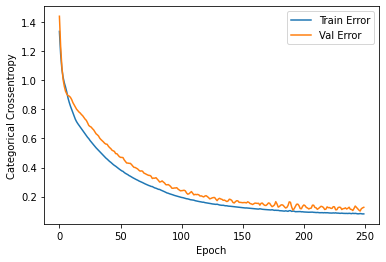

In [ ]:
import matplotlib.pyplot as plt

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy')

plt.plot(hist['epoch'], hist['loss'],
       label='Train Error')
plt.plot(hist['epoch'], hist['val_loss'],
       label = 'Val Error')

plt.legend();

**Ejercicio 3¶**

Se deberá crear un modelo consistente en una red sencilla compuesta por:

*  Entrada de datos de dimensión (2,).
*  Una unica capa oculta densa con 2 neuronas que implemente la función de activación "linear". Es importante no olvidar la función de activación mencionada.
*   Una capa densa a la salida con una única neurona que implemente la función de activación "li

El esquema de la red sería el siguiente:

simple_net

La construcción del modelo puede realizarse de manera análoga a la de los apartados "definición del modelo" o "proceso completo".

No es necesario ni compilar ni entrenar el modelo. Las neuronas tendrán pesos y bias asignados de manera aleatoria.

In [ ]:
inputs = keras.Input(shape=(2,), name='input_layer')
l_1 = layers.Dense(2, activation='relu', name='layer_1')(inputs)   
outputs = layers.Dense(1, name='output_layer',activation='relu')(l_1)
model = keras.Model(inputs=inputs, outputs=outputs, name='example_model')

model.summary()

Model: "example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 2)]               0         
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 output_layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


**EJERCICIO 4**


En el apartado de definición de modelos con Keras se presentó la manera de obtener información sobre las capas y los valores de los pesos y biases asignados (de manera aleatoria) a cada neurona.

Para el modelo construido en el ejercicio anterior, para la capa oculta y la capa de salida, devuelva los pesos y los bias interpretando los valores.

Para cada capa será suficiente con decir:
*   Para los pesos, decir qué valor se corresponde con qué entrada-neurona.
*   Para los biases, decir qué valor se corresponde con qué neurona

In [ ]:
weights, biases = model.layers[1].get_weights()
print("Pesos de la primera capa oculta:\n{}".format(weights))
print("Biases de la primera capa oculta:\n{}".format(weights))

Pesos de la primera capa oculta:
[[-0.03132772 -0.43973184]
 [ 0.90066063 -1.1952446 ]]
Biases de la primera capa oculta:
[[-0.03132772 -0.43973184]
 [ 0.90066063 -1.1952446 ]]


**Ejercicio 5**

In [ ]:
import numpy as np
x = np.array([
    [0, 1]
])